In [1]:
%%HTML
<img src='codes.jpg'>

In [2]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

In [3]:
from scipy.interpolate import interp1d
from copy import deepcopy

In [4]:
def inter(Obs, ndots=100):
    interpolated = []
    for obs in Obs:
        x = np.linspace(0, 100, num=obs.shape[0], endpoint=True)
        f = interp1d(x, obs, kind='slinear')
        xnew = np.linspace(0, 100, num=ndots, endpoint=True)
        interpolated.append(f(xnew))
    return interpolated

In [5]:
def stat(data):
    for block in data:
        lens = []
        for s in data[block]['acc']['x']:
            lens.append(len(s))
        size = len(data[block]['acc']['x'])
        print block, ':  size =',size, '  median length =',np.median(lens), '  min length =',np.min(lens), '  max length =',np.max(lens)

In [6]:
def integrate(data):
    data_int = deepcopy(data)
    for block in data_int:
        for signal_type in data_int[block]:
            for axis in data_int[block][signal_type]:
                for obs_ind in range(len(data_int[block][signal_type][axis])):
                    data_int[block][signal_type][axis][obs_ind] = np.cumsum(data_int[block][signal_type][axis][obs_ind])
    return data_int

In [7]:
def read_data(filename):
    data = {}
    with open(filename, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in reader:
            block = row[-1][1:]
            if block.isdigit():
                block = int(block)
            del row[-1]
            del row[0]
            if not block in data:
                data[block] = {}
                data[block]['gyr'] = {}
                data[block]['acc'] = {}
                data[block]['gyr']['x'] = []
                data[block]['gyr']['y'] = []
                data[block]['gyr']['z'] = []
                data[block]['acc']['x'] = []
                data[block]['acc']['y'] = []
                data[block]['acc']['z'] = []
            frow = np.array(map(float, row))
            data[block]['acc']['x'].append(np.array(frow[range(0,len(row),6)]))
            data[block]['acc']['y'].append(np.array(frow[range(1,len(row),6)]))
            data[block]['acc']['z'].append(np.array(frow[range(2,len(row),6)]))
            data[block]['gyr']['x'].append(np.array(frow[range(3,len(row),6)]))
            data[block]['gyr']['y'].append(np.array(frow[range(4,len(row),6)]))
            data[block]['gyr']['z'].append(np.array(frow[range(5,len(row),6)]))
    return data

In [102]:
def plot_block_signal(data, n_block, x_range, y_range):
    fig = plt.figure(figsize=(10, 5))
    gyr_x = fig.add_subplot(231)
    for series in data[n_block]['gyr']['x']:
        gyr_x.plot(series, 'b', linewidth=3, alpha=0.5)
    gyr_x.set_title('x')
    gyr_x.set_ylabel('Gyroscope')
    gyr_x.set_xlim(x_range)
    gyr_x.set_ylim(y_range)
    gyr_y = fig.add_subplot(232)
    for series in data[n_block]['gyr']['y']:
        gyr_y.plot(series, 'r', linewidth=3, alpha=0.5)
    gyr_y.set_title('y')
    gyr_y.set_xlim(x_range)
    gyr_y.set_ylim(y_range)
    gyr_z = fig.add_subplot(233)
    for series in data[n_block]['gyr']['z']:
        gyr_z.plot(series, 'g', linewidth=3, alpha=0.5)
    gyr_z.set_title('z')
    gyr_z.set_xlim(x_range)
    gyr_z.set_ylim(y_range)
    acc_x = fig.add_subplot(234)
    for series in data[n_block]['acc']['x']:
        acc_x.plot(series, 'b', linewidth=3, alpha=0.5)
    acc_x.set_title('x')
    acc_x.set_ylabel('Accelerometer')
    acc_x.set_xlim(x_range)
    acc_x.set_ylim(y_range)
    acc_y = fig.add_subplot(235)
    for series in data[n_block]['acc']['y']:
        acc_y.plot(series, 'r', linewidth=3, alpha=0.5)
    acc_y.set_title('y')
    acc_y.set_xlim(x_range)
    acc_y.set_ylim(y_range)
    acc_z = fig.add_subplot(236)
    for series in data[n_block]['acc']['z']:
        acc_z.plot(series, 'g', linewidth=3, alpha=0.5)
    acc_z.set_title('z')
    acc_z.set_xlim(x_range)
    acc_z.set_ylim(y_range)
    plt.show()
    
def plot_block_gest(data, n_block):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121, projection='3d')
    for ind in range(len(data[n_block]['gyr']['x'])):
        ax.plot(data[n_block]['gyr']['x'][ind], data[n_block]['gyr']['y'][ind], data[n_block]['gyr']['z'][ind])
    ax.set_title('Gyroscope')
    ax = fig.add_subplot(122, projection='3d')
    for ind in range(len(data[n_block]['acc']['x'])):
        ax.plot(data[n_block]['acc']['x'][ind], data[n_block]['acc']['y'][ind], data[n_block]['acc']['z'][ind])
    ax.set_title('Accelerometer')
    plt.show()

In [24]:
data1 = read_data('data1.csv') # Your data
data2 = read_data('data2.csv') # My data (I dont have a gyroscope)

In [25]:
stat(data1)

1 :  size = 13   median length = 48.0   min length = 39   max length = 80
2 :  size = 7   median length = 37.0   min length = 30   max length = 52
3 :  size = 6   median length = 34.5   min length = 32   max length = 41
4 :  size = 7   median length = 36.0   min length = 34   max length = 43
5 :  size = 4   median length = 38.0   min length = 37   max length = 41
6 :  size = 5   median length = 37.0   min length = 35   max length = 41
7 :  size = 5   median length = 37.0   min length = 35   max length = 41
8 :  size = 9   median length = 36.0   min length = 33   max length = 40
9 :  size = 9   median length = 30.0   min length = 25   max length = 36
10 :  size = 4   median length = 29.5   min length = 28   max length = 32
11 :  size = 8   median length = 26.0   min length = 22   max length = 29
12 :  size = 11   median length = 29.0   min length = 26   max length = 32
13 :  size = 11   median length = 35.0   min length = 29   max length = 45
14 :  size = 9   median length = 30.0   min 

In [26]:
stat(data2)

1 :  size = 8   median length = 31.5   min length = 28   max length = 40
2 :  size = 8   median length = 36.0   min length = 31   max length = 39
3 :  size = 7   median length = 42.0   min length = 29   max length = 47
4 :  size = 7   median length = 38.0   min length = 33   max length = 47
5 :  size = 7   median length = 43.0   min length = 37   max length = 50
6 :  size = 6   median length = 38.5   min length = 31   max length = 45
7 :  size = 9   median length = 45.0   min length = 38   max length = 53
8 :  size = 10   median length = 47.5   min length = 36   max length = 59
9 :  size = 15   median length = 42.0   min length = 29   max length = 53
10 :  size = 10   median length = 46.0   min length = 30   max length = 55
11 :  size = 14   median length = 41.0   min length = 34   max length = 56
12 :  size = 16   median length = 44.0   min length = 35   max length = 52
13 :  size = 11   median length = 45.0   min length = 35   max length = 55
14 :  size = 12   median length = 41.0   

First, plot the signals of some blocks.

<IPython.core.display.Javascript object>


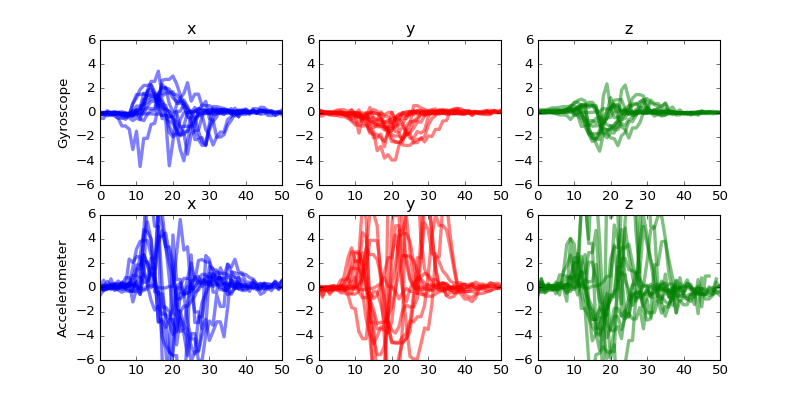

<IPython.core.display.Javascript object>


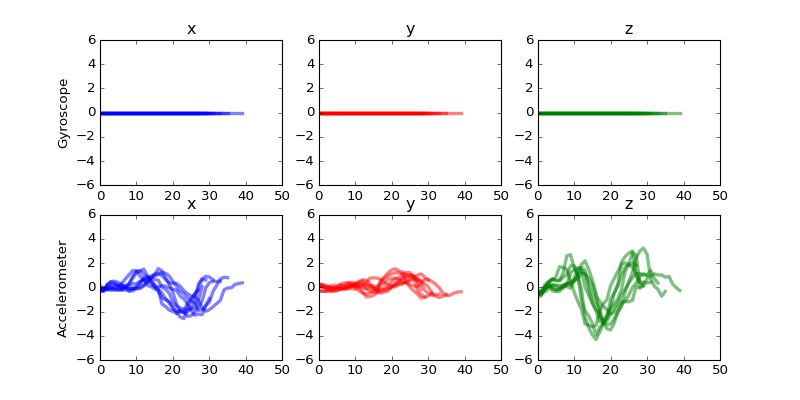

In [105]:
plot_block_signal(data1, 1, [0,50], [-6,6]) 
plot_block_signal(data2, 1, [0,50], [-6,6])

<IPython.core.display.Javascript object>


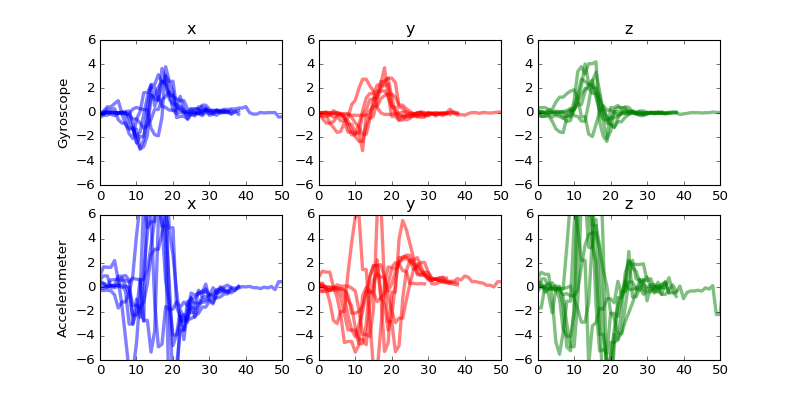

<IPython.core.display.Javascript object>


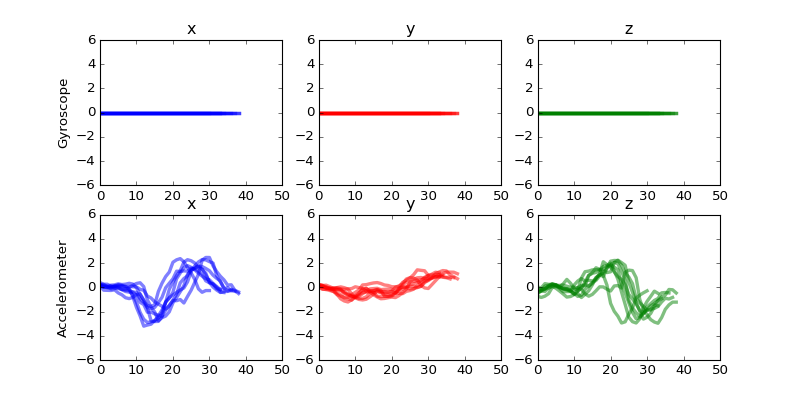

In [104]:
plot_block_signal(data1, 2, [0,50], [-6,6]) 
plot_block_signal(data2, 2, [0,50], [-6,6])

<IPython.core.display.Javascript object>


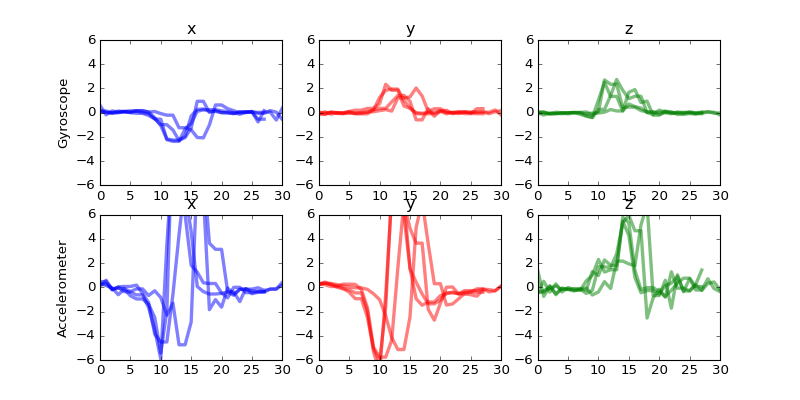

<IPython.core.display.Javascript object>


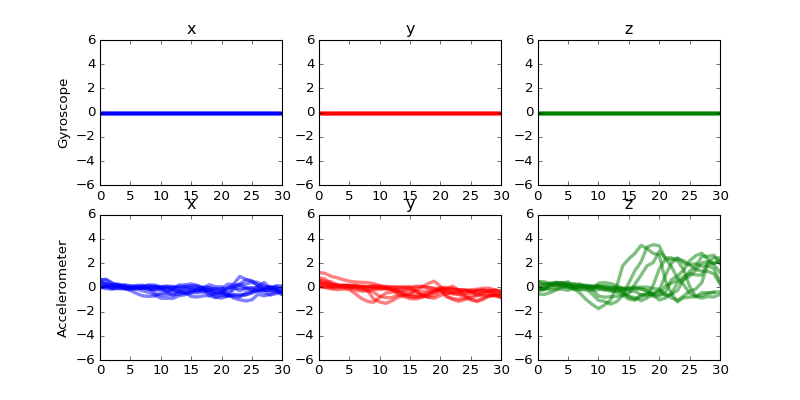

In [107]:
plot_block_signal(data1, 10, [0,30], [-6,6]) 
plot_block_signal(data2, 10, [0,30], [-6,6])

<IPython.core.display.Javascript object>


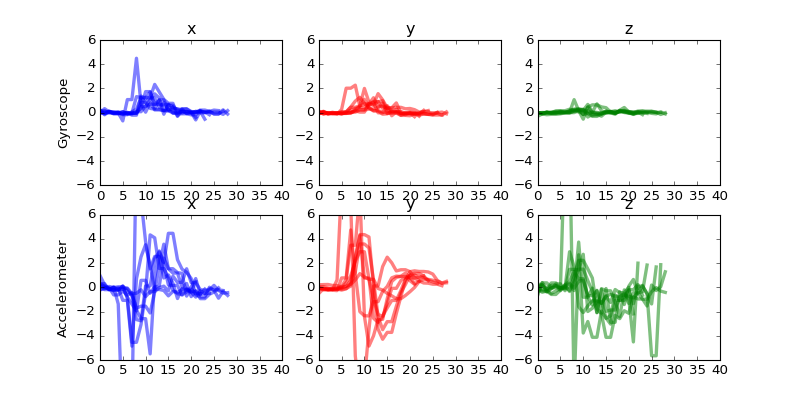

<IPython.core.display.Javascript object>


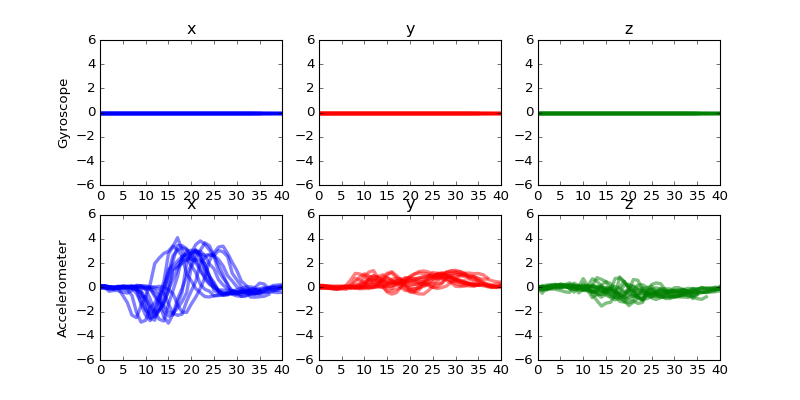

In [110]:
plot_block_signal(data1, 11, [0,40], [-6,6]) 
plot_block_signal(data2, 11, [0,40], [-6,6])

<IPython.core.display.Javascript object>


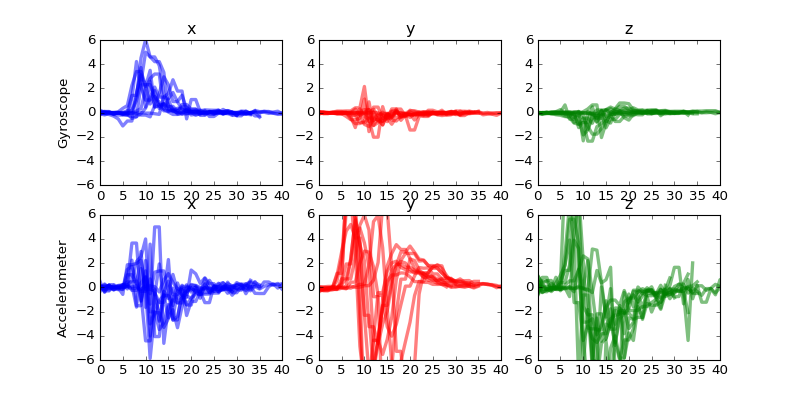

<IPython.core.display.Javascript object>


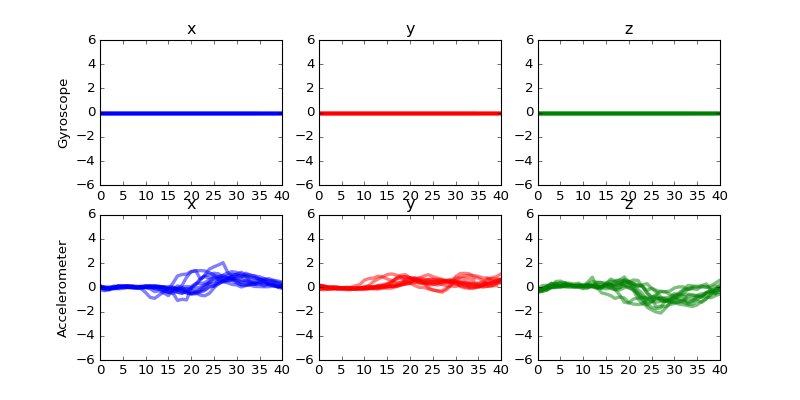

In [111]:
plot_block_signal(data1, 13, [0,40], [-6,6]) 
plot_block_signal(data2, 13, [0,40], [-6,6])

There are some common patterns, but sometimes it looks like mess, due to differences in drawing.

Now let's find first and second integrals (cumulative sums). In theory, second integral to acceleration should give us the trace of the phone. So, 1-8 blocks should give semi-circles, 9-16 -- straight lines

In [35]:
data1i = integrate(data1)
data1ii = integrate(data1i)

data2i = integrate(data2)
data2ii = integrate(data2i)

<IPython.core.display.Javascript object>


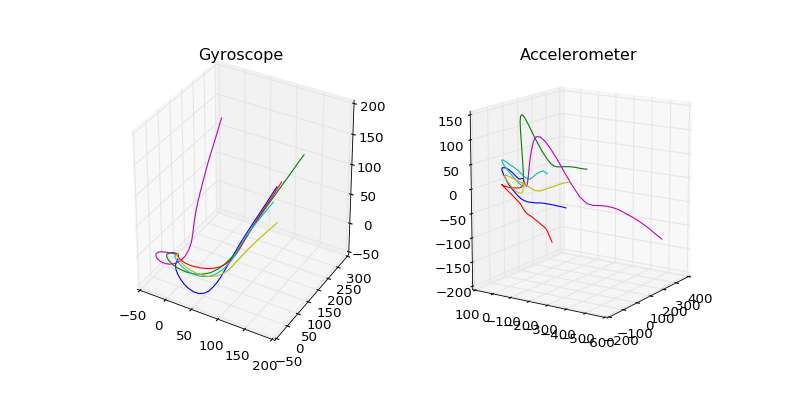

In [60]:
plot_block_gest(data1ii, 3)

<IPython.core.display.Javascript object>


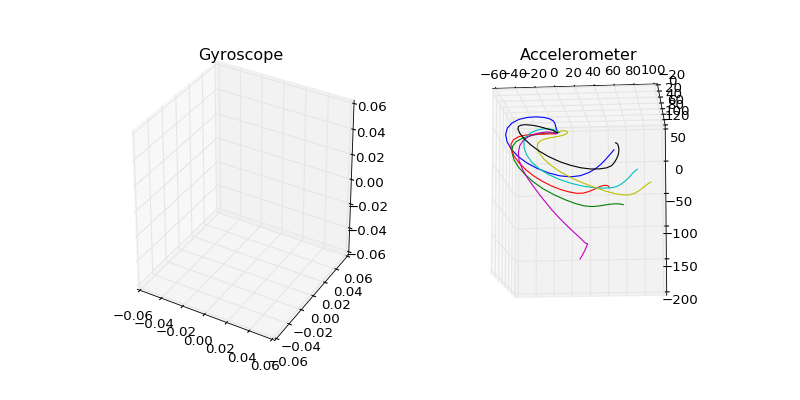

In [61]:
plot_block_gest(data2ii, 3)

<IPython.core.display.Javascript object>


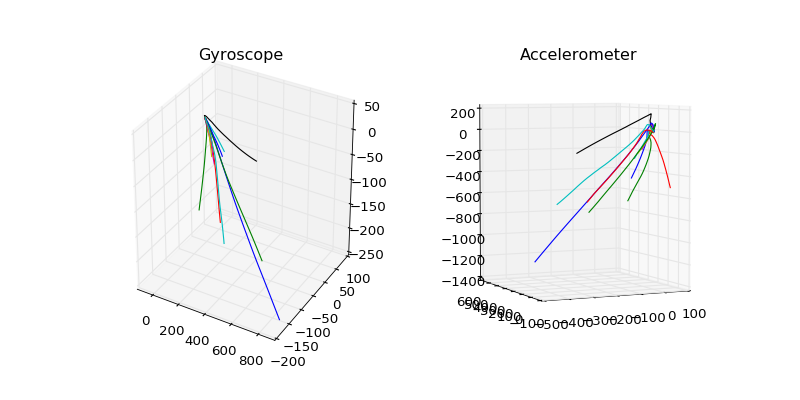

In [58]:
plot_block_gest(data1ii, 13)

<IPython.core.display.Javascript object>


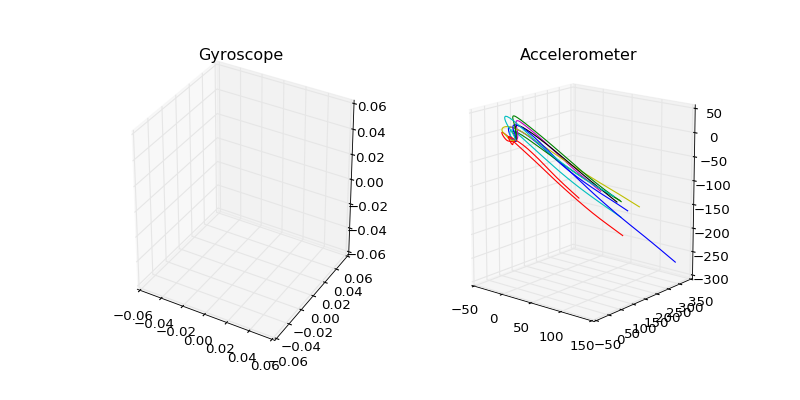

In [59]:
plot_block_gest(data2ii, 13)

<IPython.core.display.Javascript object>


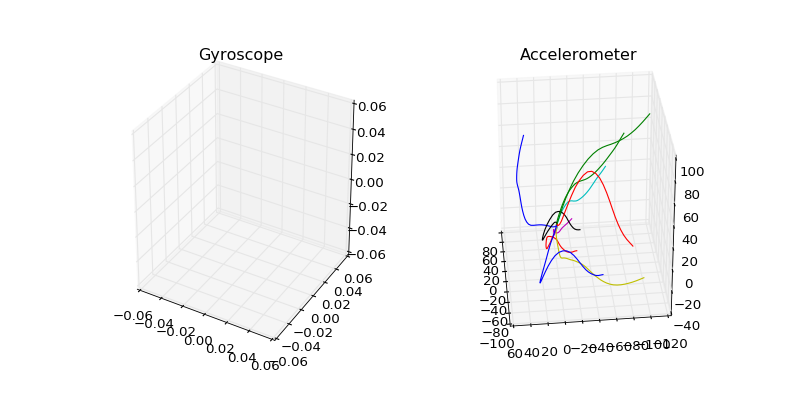

In [62]:
plot_block_gest(data2ii, 16)

If you have a great imagination, it kind of works sometimes. But let's be honest -- not much, due to the noise in data.

I don't know, if there is any sense to integrate gyroscope values. Although, it gives some intersting results:

<IPython.core.display.Javascript object>


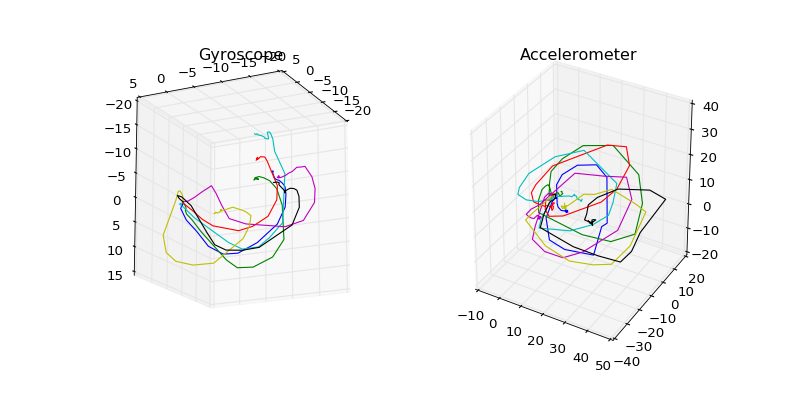

In [66]:
plot_block_gest(data1i, 4)

<IPython.core.display.Javascript object>


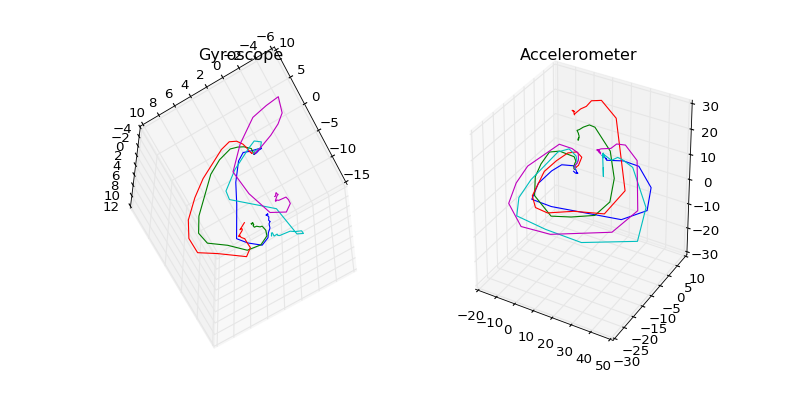

In [67]:
plot_block_gest(data1i, 6)

<IPython.core.display.Javascript object>


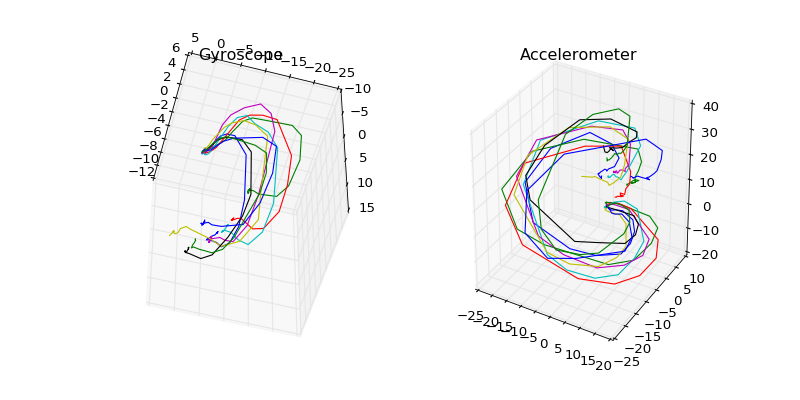

In [68]:
plot_block_gest(data1i, 8)

<IPython.core.display.Javascript object>


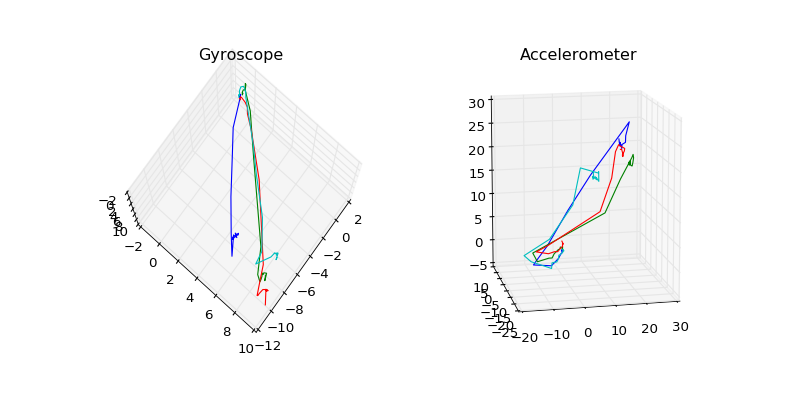

In [69]:
plot_block_gest(data1i, 10)

<IPython.core.display.Javascript object>


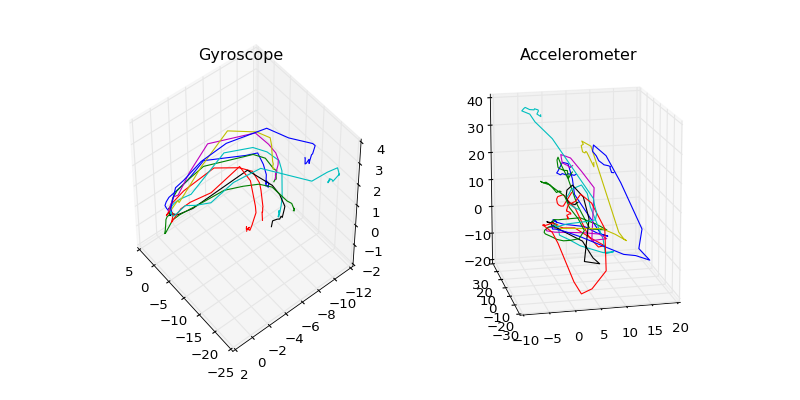

In [70]:
plot_block_gest(data1i, 12)

<IPython.core.display.Javascript object>


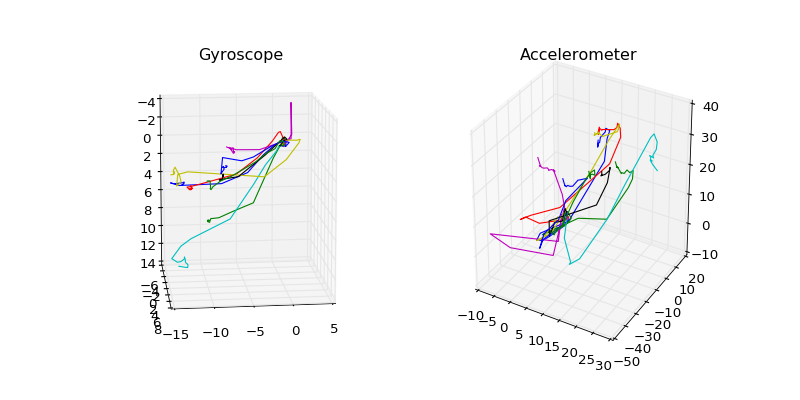

In [75]:
plot_block_gest(data1i, 14)

<IPython.core.display.Javascript object>


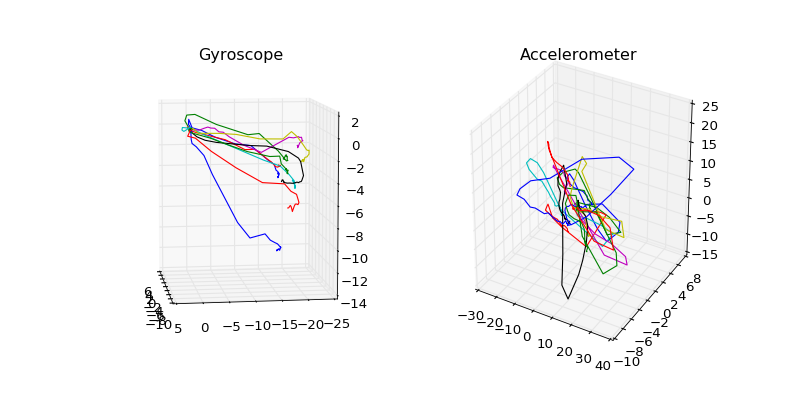

In [76]:
plot_block_gest(data1i, 16)

Mostly, it draws the plausible trace.